In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
mouse_and_trial_data = pd.merge(mouse_data, trial_data)

# Display the data table for preview
mouse_and_trial_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_volume_data = mouse_and_trial_data.groupby(["Drug", "Timepoint"]).mean()
mean_volume_data = mean_volume_data.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})
mean_volume_data

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_volume_data = mouse_and_trial_data.groupby(["Drug", "Timepoint"]).sem()
sem_volume_data = sem_volume_data.rename(columns={"Tumor Volume (mm3)":"Standard Error"})
sem_volume_data

# Merge Mean Volume & Standard Error into one DataFrame
summary = pd.merge(mean_volume_data, sem_volume_data, on=["Drug", "Timepoint"])

#Create series of each to use for plotting
means = summary["Mean Tumor Volume (mm3)"]
sem = summary["Standard Error"]

# Preview DataFrame
summary = summary[["Mean Tumor Volume (mm3)", "Standard Error"]]


#Reset index for plotting
new_summary = summary.reset_index()
new_summary
    

,Drug,Timepoint,Mean Tumor Volume (mm3),Standard Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731
...,...,...,...,...
95,Zoniferol,25,55.432935,0.602513
96,Zoniferol,30,57.713531,0.800043
97,Zoniferol,35,60.089372,0.881426
98,Zoniferol,40,62.916692,0.998515


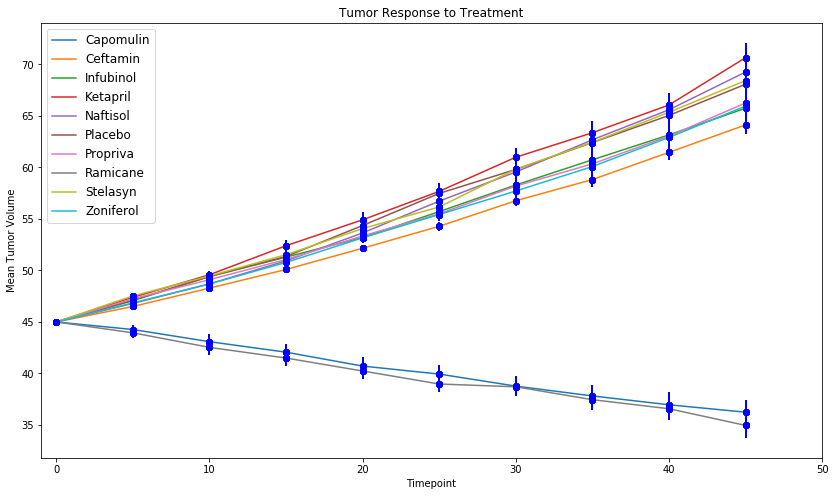

In [3]:
x = new_summary.set_index('Timepoint')
axes = x.groupby('Drug')['Mean Tumor Volume (mm3)'].plot(legend=True, figsize = (14, 8))

# create valid markers from mpl.markers
#valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if 
#item[1] is not 'nothing' and not item[1].startswith('tick') 
#and not item[1].startswith('caret')])

# use fillable markers
# valid_markers = mpl.markers.MarkerStyle.filled_markers


for ax in axes:
    ax.errorbar(new_summary["Timepoint"], means, yerr=sem, fmt="o", color="b", alpha=0.5)
                                                             
    ax.set_xlim(-1, 50)

    ax.set_xlabel("Timepoint")

    ax.set_ylabel("Mean Tumor Volume")
    
    plt.title("Tumor Response to Treatment")

    plt.legend(loc=2, fontsize="large", fancybox=True)
    
#markers = np.random.choice(valid_markers, x.shape[1], replace=False)
#for i, line in enumerate(ax.get_lines()):
#        line.set_marker(markers[i])    
axes
# Save the Figure
plt.savefig("Images/tumor_response_to_treatment.png")






![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [4]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_data = mouse_and_trial_data[[ "Drug", "Timepoint", "Metastatic Sites"]]
meta_data.head()

# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 

mean_meta_data = meta_data.groupby(["Drug", "Timepoint"]).mean()
mean_meta_data = mean_meta_data.rename(columns={"Metastatic Sites":"Mean Metastatic Sites"})
mean_meta_data

# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_meta_data = meta_data.groupby(["Drug", "Timepoint"]).sem()
sem_meta_data = sem_meta_data.rename(columns={"Metastatic Sites":"Standard Error"})
sem_meta_data

# Merge Mean Volume & Standard Error into one DataFrame
summary_met_data = pd.merge(mean_meta_data, sem_meta_data, on=["Drug", "Timepoint"])


# Create seires of each to use for plotting
met_means = summary_met_data["Mean Metastatic Sites"]
met_sem = summary_met_data["Standard Error"]

# Preview DataFrame
met_data = summary_met_data.reset_index()
met_data


,Drug,Timepoint,Mean Metastatic Sites,Standard Error
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621
...,...,...,...,...
95,Zoniferol,25,1.687500,0.236621
96,Zoniferol,30,1.933333,0.248168
97,Zoniferol,35,2.285714,0.285714
98,Zoniferol,40,2.785714,0.299791


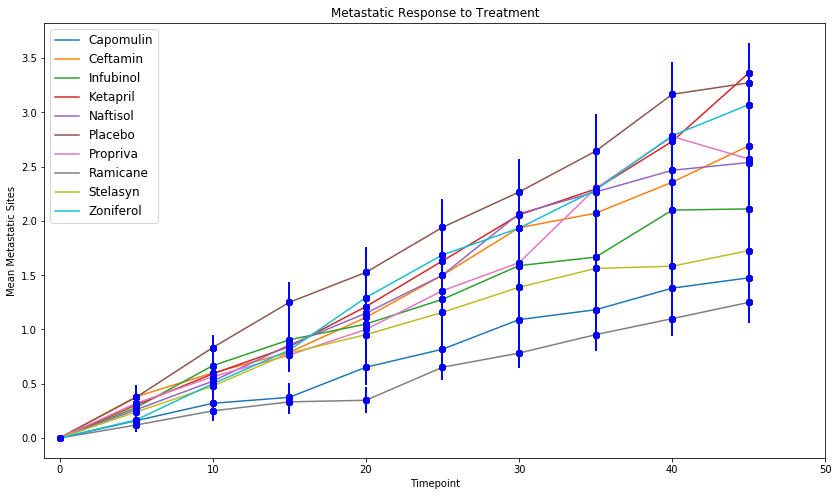

In [5]:
# Generate the Plot (with Error Bars)

m = met_data.set_index('Timepoint')
axes = m.groupby('Drug')['Mean Metastatic Sites'].plot(legend=True, figsize = (14, 8))


for ax in axes:
    ax.errorbar(met_data["Timepoint"], met_means, yerr=met_sem, fmt="o", color="b", alpha=0.5)
                                                             
    ax.set_xlim(-1, 50)

    ax.set_xlabel("Timepoint")

    ax.set_ylabel("Mean Metastatic Sites")

    plt.legend(loc=2, fontsize="large", fancybox=True)
                                                          
plt.title("Metastatic Response to Treatment")

axes
                                                          

# Save the Figure
plt.savefig("Images/metastatic_response_to_treatment.png")


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

* Create a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [6]:
# Eliminate unwated columns from starter csv
mouse_data = mouse_and_trial_data[[ "Drug", "Timepoint", "Mouse ID"]]

 
# Store the # of mice grouped by Drug and Timepoint 
count_of_mice = mouse_data.groupby(["Drug", "Timepoint"]).count()

# Create series to store number of mice for plotting
mice = count_of_mice["Mouse ID"]

# Store the Standard Error associated with # of Mice Grouped by Drug and Timepoint 
count_of_mice["Standard Error"] = mice.sem()

# Reset index for plotting
count_of_mice = count_of_mice.reset_index()

# Preview DataFrame
count_of_mice

,Drug,Timepoint,Mouse ID,Standard Error
0,Capomulin,0,25,0.478596
1,Capomulin,5,25,0.478596
2,Capomulin,10,25,0.478596
3,Capomulin,15,24,0.478596
4,Capomulin,20,23,0.478596
...,...,...,...,...
95,Zoniferol,25,16,0.478596
96,Zoniferol,30,15,0.478596
97,Zoniferol,35,14,0.478596
98,Zoniferol,40,14,0.478596


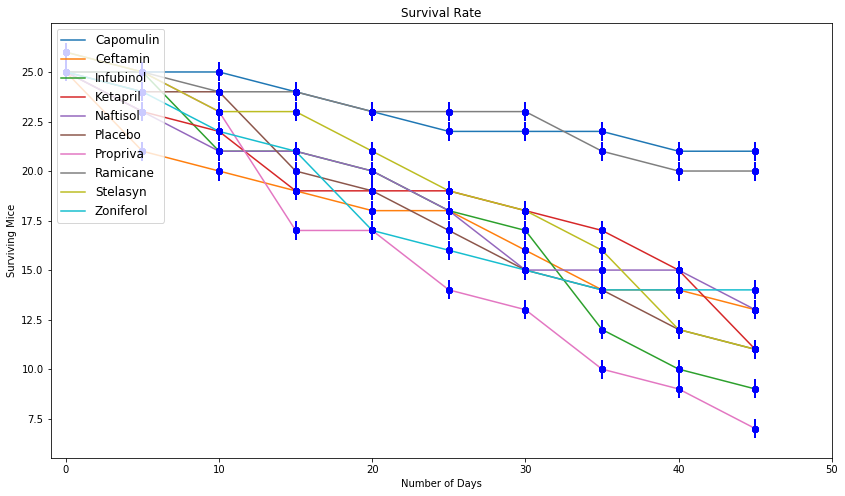

In [7]:
# Set index to Timepoint, save to variable
s = count_of_mice.set_index('Timepoint')
axes = s.groupby('Drug')['Mouse ID'].plot(legend=True, figsize = (14, 8))


for ax in axes:
    ax.errorbar(count_of_mice["Timepoint"], mice, yerr=count_of_mice["Standard Error"], fmt="o", color="b", alpha=0.5)
                                                             
    ax.set_xlim(-1, 50)

    ax.set_xlabel("Number of Days")

    ax.set_ylabel("Surviving Mice")

    plt.legend(loc=2, fontsize="large", fancybox=True)
    
plt.title("Survival Rate")
                                                          

axes
                                                          

# Save the Figure
plt.savefig("Images/survival_rate.png")




![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

* Create a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
* Bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar.

In [8]:
#Group summary info from first DataFrame/Chart by Drug
grouped = new_summary.groupby('Drug')

# Store drug names
drugs = []

# Store all Relevant Percent Changes into a Series
pct_change = pd.Series([])

#Loop through grouped object, grab first and last timepoint, add drug name to drugs list
for idxs, group in grouped:
    trials = group.iloc[[0, -1]]
    drugs.append(idxs)
    
    # Calculate the percent changes for each drug, keep last value
    change = (trials['Mean Tumor Volume (mm3)'].pct_change()).tail(1)
    pct_change = pct_change.append(change)

#Create dictionary and convert to DataFrame
final = {'Drug Name': drugs, 'Percent Change in Volume': pct_change}
final_summary = pd.DataFrame(data=final)


# Display the data to confirm
final_summary

,Drug Name,Percent Change in Volume
9,Capomulin,-0.194753
19,Ceftamin,0.425165
29,Infubinol,0.461235
39,Ketapril,0.570288
49,Naftisol,0.539233
59,Placebo,0.512980
69,Propriva,0.472412
79,Ramicane,-0.223209
89,Stelasyn,0.520851
99,Zoniferol,0.465798


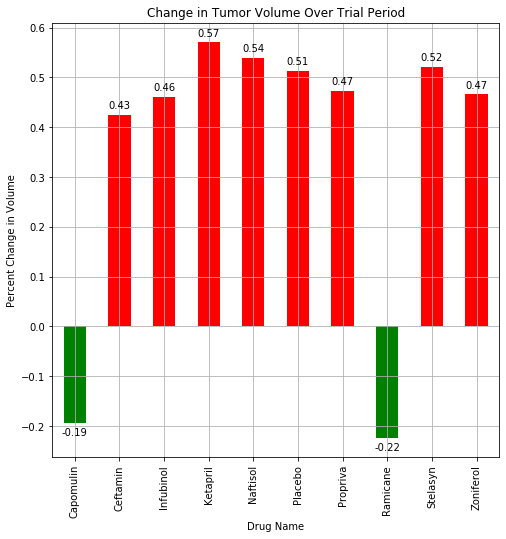

In [9]:
# Plot data using a bar graph
ax = final_summary.plot(kind="bar", x="Drug Name", y="Percent Change in Volume", grid = True, figsize=(8,8),
    color=(final_summary['Percent Change in Volume'] > 0).map({True: 'r', False: 'g'}), 
        title="Change in Tumor Volume Over Trial Period", legend = False )

#Save bar info 
rects = ax.patches

# Use functions to label the percentages of changes
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        label = "{:,.2f}".format(height)
        if height >=0:
            label_position = height + (y_height * 0.01)
            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                  label,
                ha='center', va='bottom')
        else:
            label_position = height + (y_height * -0.01)
            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                  label,
                ha='center', va='top')
            
#Call function
autolabel(rects, ax)

#Add Y label
plt.ylabel("Percent Change in Volume")

# Save the Figure
plt.savefig("Images/percent_change.png")

                    